In [1]:
import time
import datetime
from uniswappy import *
import matplotlib.pyplot as plt

In [2]:
# -------------------
# Canonical Settings
# -------------------
time_window = 3
trade_bias = 0.5
max_trade_percent = 0.003
init_investment = 1

eth_api = API0x(chain = Chain0x.ETHEREUM)
bnb_api = API0x(chain = Chain0x.BINANCE)

# -------------------
# Sell Tokens
# -------------------
usdc_tkn_nm = "USDC"
usdc_sell_token = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'

usdc_tkn_nm = "USDT"
usdt_sell_token = '0xdAC17F958D2ee523a2206206994597C13D831ec7'

usdc_tkn_nm = "DAI"
dai_sell_token =  '0x6B175474E89094C44Da98b954EedeAC495271d0F'

# -------------------
# WETH Settings
# -------------------
weth_tkn_nm = "WETH"
weth_buy_token = '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
weth_init_amt = 1000
weth_td_model = TokenDeltaModel(max_trade = max_trade_percent*weth_init_amt, 
                                shape=1, # Gamma Dist. shape  
                                scale=1) # Gamma Dist. scale 

# -------------------
# LINK Settings
# -------------------
link_tkn_nm = "LINK"
link_buy_token = '0x514910771AF9Ca656af840dff83E8264EcF986CA' 
link_init_amt = 100000
link_td_model = TokenDeltaModel(max_trade = max_trade_percent*link_init_amt, 
                                shape=1, # Gamma Dist. shape 
                                scale=1) # Gamma Dist. scale

# -------------------
# UNI Settings
# -------------------
uni_tkn_nm = "UNI"
uni_buy_token = '0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984'
uni_init_amt = 100000
uni_td_model = TokenDeltaModel(max_trade = max_trade_percent*uni_init_amt, 
                               shape=1, # Gamma Dist. shape 
                               scale=1) # Gamma Dist. scale

# -------------------
# WBTC Settings
# -------------------
wbtc_tkn_nm = "WBTC"
wbtc_buy_token = '0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599'
wbtc_init_amt = 100
wbtc_td_model = TokenDeltaModel(max_trade = max_trade_percent*wbtc_init_amt, 
                               shape=1, # Gamma Dist. shape 
                               scale=1) # Gamma Dist. scale

# -------------------
# BNB Settings
# -------------------
bnb_tkn_nm = "BNB"
bnb_buy_token = '0xB8c77482e45F1F44dE1745F52C74426C631bDD52'

bnb_init_amt = 10000
bnb_td_model = TokenDeltaModel(max_trade = max_trade_percent*bnb_init_amt, 
                               shape=1, # Gamma Dist. shape 
                               scale=1) # Gamma Dist. scale


# -------------------
# ETHDenverSim
# -------------------
sim = ETHDenverSimulator(buy_token = weth_buy_token,
                         sell_token = usdc_sell_token,
                         time_window = 3,
                         trade_bias = trade_bias,
                         td_model = weth_td_model,
                         api = eth_api)

sim.init_lp(init_x_tkn = weth_init_amt, x_tkn_nm = weth_tkn_nm, init_x_invest = init_investment)

# --------------------
# INFINITE PROCESS
# --------------------
# sim.process()  

# --------------------
# RETRIEVE STATE DATA
# --------------------
# swap_x_reserve = sim.get_x_reserve(ETHDenverSimulator.STATE_SWAP)
# swap_y_reserve = sim.get_y_reserve(ETHDenverSimulator.STATE_SWAP)

# arb_x_reserve = sim.get_x_reserve(ETHDenverSimulator.STATE_ARB)
# arb_y_reserve = sim.get_y_reserve(ETHDenverSimulator.STATE_ARB)

# swap_lp_price = sim.get_lp_price(ETHDenverSimulator.STATE_SWAP)
# arb_lp_price = sim.get_lp_price(ETHDenverSimulator.STATE_ARB)

# swap_amt = sim.get_swap_amt()

In [3]:
N_TRIALS = 20
x_amt_arr = []
y_amt_arr = []
y_redeem_arr = []
x_redeem_arr = []
lp_price_arr = []
tstamp_arr = []
swap_amt_arr = []
swap_tstamp_arr = []
trial_volume_arr = []

for k in range(N_TRIALS):
    sim.trial()
    y_redeem_arr.append(sim.get_y_redeem())
    x_redeem_arr.append(sim.get_x_redeem()) 
    tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_SWAP))
    tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_ARB))    
    x_amt_arr.append(sim.get_x_reserve(ETHDenverSimulator.STATE_SWAP))
    x_amt_arr.append(sim.get_x_reserve(ETHDenverSimulator.STATE_ARB))
    y_amt_arr.append(sim.get_y_reserve(ETHDenverSimulator.STATE_SWAP))
    y_amt_arr.append(sim.get_y_reserve(ETHDenverSimulator.STATE_ARB))   
    lp_price_arr.append(sim.get_lp_price(ETHDenverSimulator.STATE_SWAP))
    lp_price_arr.append(sim.get_lp_price(ETHDenverSimulator.STATE_ARB))
    swap_tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_ARB))
    swap_amt_arr.append(sim.get_swap_amt())
    trial_volume_arr.append(sim.get_usd_trial_volume())
    if (k % 1 == 0): print(f"Trial {k}")   

Trial 0
Trial 1
Trial 2
Trial 3
Trial 4
Trial 5
Trial 6
Trial 7
Trial 8
Trial 9
Trial 10
Trial 11
Trial 12
Trial 13
Trial 14
Trial 15
Trial 16
Trial 17
Trial 18
Trial 19


Text(0, 0.5, 'WETH Swap Amounts')

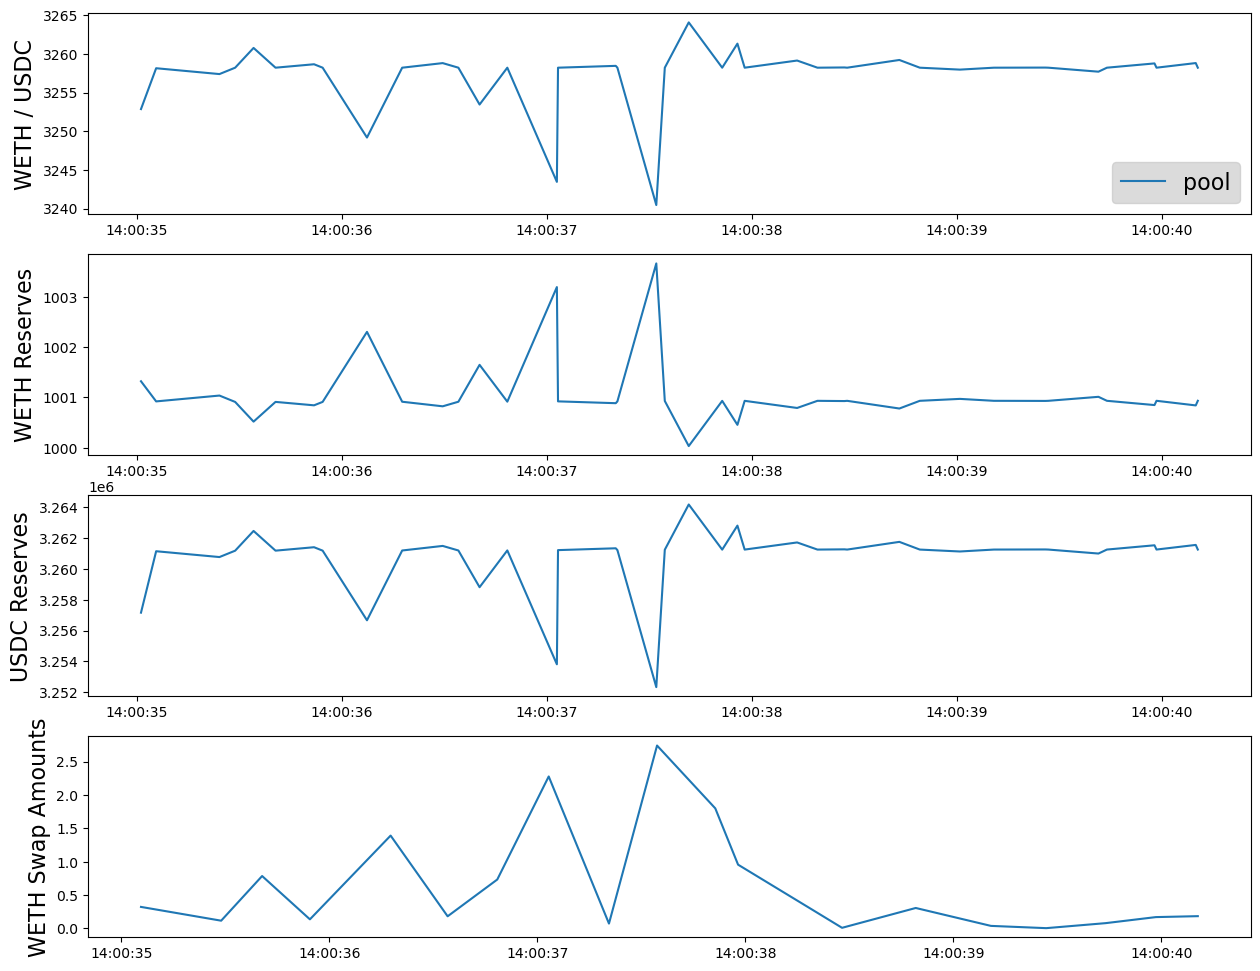

In [4]:
fig, (p_ax, tkn1_ax, tkn2_ax, s_ax) = plt.subplots(nrows=4, sharex=False, sharey=False, figsize=(15, 12))
p_ax.plot(tstamp_arr, lp_price_arr, label='pool')
p_ax.set_ylabel(f'{sim.get_x_tkn().token_name} / {sim.get_y_tkn().token_name}', fontsize=16)
p_ax.legend(fontsize=16, facecolor="lightgray", loc='lower right')

tkn1_ax.plot(tstamp_arr, x_amt_arr)
tkn1_ax.set_ylabel(f'{sim.get_x_tkn().token_name} Reserves', fontsize=16)

tkn2_ax.plot(tstamp_arr, y_amt_arr)
tkn2_ax.set_ylabel(f'{sim.get_y_tkn().token_name} Reserves', fontsize=16)

s_ax.plot(swap_tstamp_arr, swap_amt_arr)
s_ax.set_ylabel(f'{sim.get_x_tkn().token_name} Swap Amounts', fontsize=16)

Text(0, 0.5, 'Volume USDC ')

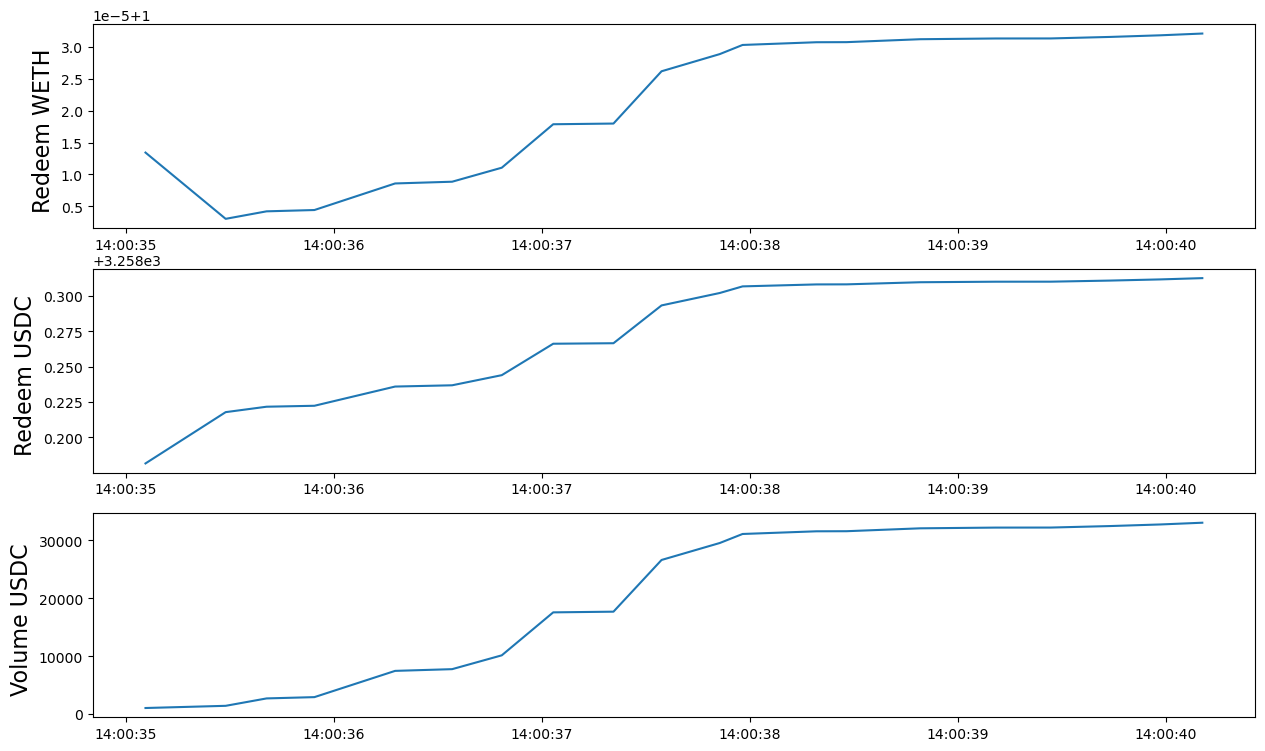

In [5]:
fig, (x_ax, y_ax, vol_ax) = plt.subplots(nrows=3, sharex=False, sharey=False, figsize=(15, 9))
x_ax.plot(swap_tstamp_arr, x_redeem_arr, label='x redeem')
x_ax.set_ylabel(f'Redeem {sim.get_x_tkn().token_name} ', fontsize=16)

y_ax.plot(swap_tstamp_arr, y_redeem_arr, label='y redeem')
y_ax.set_ylabel(f'Redeem {sim.get_y_tkn().token_name} ', fontsize=16)

vol_ax.plot(swap_tstamp_arr, np.cumsum(trial_volume_arr), label='y redeem')
vol_ax.set_ylabel(f'Volume {sim.get_y_tkn().token_name} ', fontsize=16)